In [ ]:
'''
Panagiotis Christakakis
'''

**Process before calculating metrics**

In [1]:
# Import Libraries

import random
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [108]:
# Import Gnutella p2p Network from txt file

G = nx.read_edgelist('./p2p-Gnutella05.txt', comments='#',
                     create_using=nx.DiGraph, 
                     delimiter='\t', 
                     nodetype=int, 
                     encoding='utf-8')

In [101]:
# Import Quantum Cosmology collaboration Network from txt file

G = nx.read_edgelist('./CA-GrQc.txt', comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter='\t', 
                     nodetype=int, 
                     encoding='utf-8')

In [42]:
# Define number of N that will represent
# the total number of nodes when trying to
# generate synthetic networks.

n = 5200

In [43]:
# Create a Erdős-Renyi Network

G = nx.erdos_renyi_graph(n, 0.002174, seed = 42, directed = False)

In [58]:
# Create a Watts & Strogatz Network

G = nx.watts_strogatz_graph(n, 11, 0.2, seed = 42)

In [74]:
# Create a Barabasi-Albert Network

G = nx.barabasi_albert_graph(n, 5, seed = 42, initial_graph = None)

In [85]:
# Create a Barabasi-Albert Network and convert to directed

G = nx.barabasi_albert_graph(n, 3, seed = 42, initial_graph = None)

# Convert the network to directed
G = nx.to_directed(G)

# When converting a undirected to directed using NetworkX
# all edges become reciprocated so deleting random edges
# will also help to reduce the total number of edges in 
# order to meet the properties of the second model.

# Ignore some warnings produced from Random function
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

ListOfEdges = G.edges()
sample = 2202
RandomSample = random.sample(ListOfEdges, sample)

# Create a copy of the created network to be 
# able to delete the randomly picked edges.
G = G.copy()
G.remove_edges_from(RandomSample)

**Calculating metrics**

In [109]:
# Number of nodes

numNodes = len(G)
print("Number of nodes: ", numNodes)

Number of nodes:  8846


In [110]:
# Number of nodes with self-loops

selfLoops = nx.number_of_selfloops(G) 
print(selfLoops)

0


In [111]:
# Number of edges

numEdges = G.size()
print("Number of edges: ", numEdges)

Number of edges:  31839


In [112]:
# Num of reciprocated edges

# First way
recipro = nx.reciprocity(G)
print("Number of reciprocated edges: ", recipro * numEdges)

# # Second Way
# # Obtained from the source code of networkx.algorithms.reciprocity
# n_all_edge = G.number_of_edges()
# n_overlap_edge = (n_all_edge - G.to_undirected().number_of_edges()) * 2
# print("Number of reciprocated edges: ", n_overlap_edge)

# # Third way (doesn't work always right for some reason)
# # Checking if the reverse edge exists while iterating over the edges
# numReciproEdges = [(u,v,d) for (u,v,d) in G.edges(data=True) if G.has_edge(v,u)]
# print("Number of reciprocated edges: ", len(numReciproEdges))

Number of reciprocated edges:  0.0


In [113]:
# Num of sink & source nodes
# Only calculated for directed graphs

numOfSinkNodes = [node for node in G.nodes if G.out_degree(node) == 0]
print("Number of Sink Nodes: ", len(numOfSinkNodes))

numOfSourceNodes = [node for node in G.nodes if G.in_degree(node) == 0]
print("Number of Source Nodes: ", len(numOfSourceNodes))

Number of Sink Nodes:  4996
Number of Source Nodes:  118


In [114]:
# Max, min, avg Degree

degrees = [G.degree(node) for node in G]

kMin = min(degrees)
kMax = max(degrees)

print("Maximum degree: ", kMax)
print("Minimum degree: ", kMin)
print("Average degree: ", np.mean(degrees))

Maximum degree:  88
Minimum degree:  1
Average degree:  7.198507800135655


In [115]:
# Max, min, avg inDegree
# Only calculated for directed graphs

inDegrees = [G.in_degree(node) for node in G]

kMinInDegree = min(inDegrees)
kMaxInDegree = max(inDegrees)

print("Maximum degree: ", kMaxInDegree)
print("Minimum degree: ", kMinInDegree)
print("Average degree: ", np.mean(inDegrees))

Maximum degree:  79
Minimum degree:  0
Average degree:  3.5992539000678274


In [116]:
# Max, min, avg outDegree
# Only calculated for directed graphs

outDegrees = [G.out_degree(node) for node in G]

kMinOutDegree = min(outDegrees)
kMaxOutDegree = max(outDegrees)

print("Maximum degree: ", kMaxOutDegree)
print("Minimum degree: ", kMinOutDegree)
print("Average degree: ", np.mean(outDegrees))

Maximum degree:  65
Minimum degree:  0
Average degree:  3.5992539000678274


In [117]:
# Diameter of graph 

diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G)])
print("Diameter based on longest connected component: ", diameter)

Diameter based on longest connected component:  22


In [118]:
# Avg clustering coefficient & global clustering coefficient

print("Average Clustering Coefficient: ", nx.average_clustering(G))
print("Global Clustering Coefficient: ", nx.transitivity(G))

# # Otherwise average clustering can be computed with the following
# tempSum = 0
# for i in range(0, len(nx.clustering(G))):
#   tempSum += nx.clustering(G, i)
# print("Average Clustering Coefficient: ", tempSum/numNodes)

Average Clustering Coefficient:  0.003600532835551549
Global Clustering Coefficient:  0.0037461513333935685


In [119]:
# Size of Largest Strongly Connected Component
# Only calculated for directed graphs

# For only finding the largest component, computing with the use
# of max function rather than sort function is a more efficient way.
# We'd rather have max which is O(n), rather than sorting with O(n log n).
strongComp = max(nx.strongly_connected_components(G), key=len)
strongCompSubGraph = G.subgraph(strongComp)
print(strongCompSubGraph.size())

13453


In [120]:
# Size of Largest Weakly Connected Component
# Only calculated for directed graphs

# For only finding the largest component, computing with the use
# of max function rather than sort function is a more efficient way.
# We'd rather have max which is O(n), rather than sorting with O(n log n).
weakComp = max(nx.weakly_connected_components(G), key=len)
weakCompSubGraph = G.subgraph(weakComp)
print(weakCompSubGraph.size())

31837


**Plotting Degree Distribution**

In [121]:
# Plot Using the networkX degree_histogram function
# plot_degree_histogram function can be found here:
# https://stackoverflow.com/a/65051406/15172593

def plot_degree_histogram(g, normalized=True):
    print("Creating histogram...")
    aux_y = nx.degree_histogram(g)
    
    aux_x = np.arange(0,len(aux_y)).tolist()
    
    n_nodes = g.number_of_nodes()
    
    if normalized:
        for i in range(len(aux_y)):
            aux_y[i] = aux_y[i]/n_nodes
    
    return aux_x, aux_y

Creating histogram...


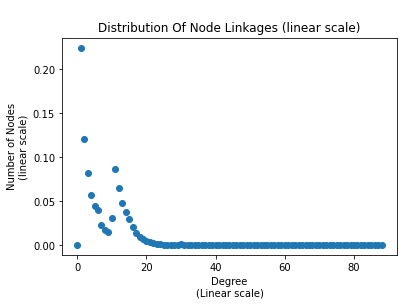

In [122]:
# Plotting Degree Distribution for Linear Scale

plt.title('\nDistribution Of Node Linkages (linear scale)')
plt.xlabel('Degree\n(Linear scale)')
plt.ylabel('Number of Nodes\n(linear scale)')
plt.xscale("linear")
plt.yscale("linear")
aux_x, aux_y = plot_degree_histogram(G)
plt.plot(aux_x, aux_y, 'o')

Creating histogram...


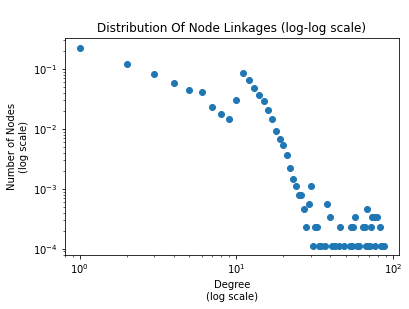

In [123]:
# Plotting Degree Distribution for Log Scale

plt.title('\nDistribution Of Node Linkages (log-log scale)')
plt.xlabel('Degree\n(log scale)')
plt.ylabel('Number of Nodes\n(log scale)')
plt.xscale("log")
plt.yscale("log")
aux_x, aux_y = plot_degree_histogram(G)
plt.plot(aux_x, aux_y, 'o')

<ipython-input-124-90ecd325d9a7>:32: RuntimeWarning: invalid value encountered in true_divide
  bin_means_x = (np.histogram(data_x, bins, weights=data_x)[0] /np.histogram(data_x, bins)[0])
<ipython-input-124-90ecd325d9a7>:33: RuntimeWarning: invalid value encountered in true_divide
  bin_means_y = (np.histogram(data_y, bins, weights=data_y)[0] /np.histogram(data_y, bins)[0])


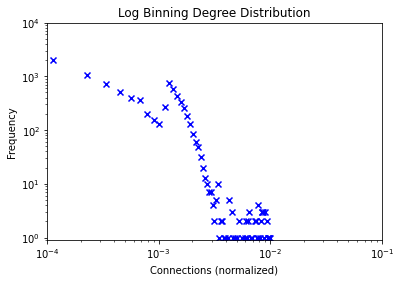

In [124]:
# Plot log binning Degree Distribution
# Functions and code can be found here:
# https://stackoverflow.com/a/65052928/15172593


from collections import Counter
import math
import networkx as nx
#import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


def drop_zeros(a_list):
    return [i for i in a_list if i>0]


def log_binning(counter_dict, bin_count=35):
    
    max_x = math.log10(max(counter_dict.keys()))
    max_y = math.log10(max(counter_dict.values()))
    max_base = max([max_x, max_y])
    
    min_x = math.log10(min(drop_zeros(counter_dict.keys())))
    
    bins = np.logspace(min_x, max_base, num=bin_count)
    
    data_x = np.array(list(counter_dict.keys()))
    data_y = np.array(list(counter_dict.values()))
    
    
    bin_means_x = (np.histogram(data_x, bins, weights=data_x)[0] /np.histogram(data_x, bins)[0])
    bin_means_y = (np.histogram(data_y, bins, weights=data_y)[0] /np.histogram(data_y, bins)[0])
    return bin_means_x, bin_means_y


ba_c = nx.degree_centrality(G)
# To convert normalized degrees to raw degrees
ba_c2 = dict(Counter(ba_c.values()))

ba_x,ba_y = log_binning(ba_c2,50)

plt.xscale("log")
plt.yscale("log")

plt.scatter(ba_x,ba_y,c='r',marker='s',s=50)
plt.scatter(ba_c2.keys(),ba_c2.values(),c='b',marker='x')

plt.xlim((1e-4,1e-1))
plt.ylim((.9,1e4))

plt.title('Log Binning Degree Distribution')
plt.xlabel('Connections (normalized)')
plt.ylabel('Frequency')

plt.show()